In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing_data = pd.read_csv('datasets/housing.csv')

In [4]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16115,-122.50,37.74,42.0,1667.0,395.0,1041.0,387.0,3.9583,273700.0,NEAR OCEAN
4068,-118.48,34.15,31.0,2536.0,429.0,990.0,424.0,5.4591,495500.0,<1H OCEAN
11158,-118.00,33.82,21.0,2253.0,580.0,1536.0,500.0,3.2326,204700.0,<1H OCEAN
7201,-118.18,34.02,36.0,1138.0,296.0,1484.0,320.0,2.2813,150700.0,<1H OCEAN
4197,-118.25,34.12,11.0,1281.0,418.0,1584.0,330.0,2.8889,153100.0,<1H OCEAN


In [5]:
housing_data = housing_data.dropna()

In [6]:
housing_data.shape

(20433, 10)

In [8]:
housing_data[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [9]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [10]:
housing_data.shape


(19475, 10)

In [11]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Convert categorical values to numeric values using one-hot encoding

In [14]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [15]:
housing_data.shape

(19475, 14)

In [16]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [17]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8392,-118.36,33.97,19.0,4651.0,1281.0,2917.0,1121.0,2.6823,142500.0,1,0,0,0,0
5468,-118.47,33.99,52.0,2167.0,622.0,1095.0,570.0,2.8514,358700.0,1,0,0,0,0
15173,-117.06,33.03,23.0,2023.0,309.0,678.0,340.0,7.0913,265400.0,1,0,0,0,0
12743,-121.36,38.63,30.0,2619.0,370.0,940.0,359.0,4.7283,164500.0,0,1,0,0,0
19909,-119.30,36.33,44.0,2060.0,414.0,819.0,355.0,2.8795,77000.0,0,1,0,0,0


In [18]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [19]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
dir(Y)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__redu

In [22]:
Y.name

'median_house_value'

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
type(x_train)

pandas.core.frame.DataFrame

In [28]:
type(y_train)

pandas.core.series.Series

In [29]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [30]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [32]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(x_train, y_train)

In [33]:
print('Train_scroe: ', linear_model.score(x_train, y_train))

Train_scroe:  0.6181914576083374


In [34]:
dir(linear_model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [35]:
linear_model.coef_


array([-2.35276826e+04, -2.14236556e+04,  9.62574416e+02, -8.72846709e+00,
        1.03644077e+02, -2.83965104e+01,  3.33421733e+01,  3.92470930e+04,
       -2.53285869e+04, -6.42813643e+04,  1.41008150e+05, -3.18017569e+04,
       -1.95964415e+04])

In [36]:
coef = pd.Series(linear_model.coef_, x_train.columns).sort_values()
print(coef)

ocean_proximity_INLAND        -64281.364341
ocean_proximity_NEAR BAY      -31801.756855
ocean_proximity_<1H OCEAN     -25328.586945
longitude                     -23527.682622
latitude                      -21423.655610
ocean_proximity_NEAR OCEAN    -19596.441501
population                       -28.396510
total_rooms                       -8.728467
households                        33.342173
total_bedrooms                   103.644077
housing_median_age               962.574416
median_income                  39247.092968
ocean_proximity_ISLAND        141008.149642
dtype: float64


In [37]:
y_pred = linear_model.predict(x_test)

In [40]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
8968,302677.615098,328100.0
1602,449450.024683,426100.0
6877,147256.105697,185000.0
19874,48836.358312,54100.0
3732,198597.995128,262200.0
2397,201841.848165,179200.0
5519,289711.777886,345900.0
11217,232279.349219,218000.0
3237,62942.312718,43800.0
13094,71168.487005,32500.0


In [41]:
from sklearn.metrics import r2_score
print('Testing_score', r2_score(y_test, y_pred))

Testing_score 0.5912639336823229


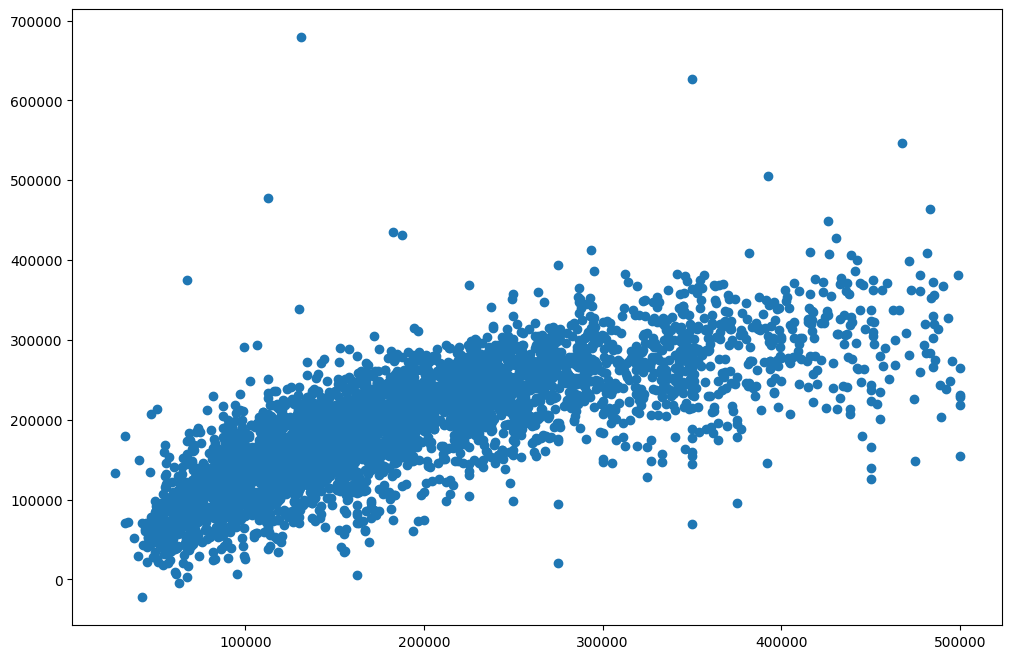

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.show()

In [44]:
df_pred_actual_sample = df_pred_actual.sample(100).reset_index()

In [45]:
df_pred_actual_sample.head()

,index,predicted,actual
0,2211,119379.954520,73000.0
1,15064,169020.584049,133700.0
2,1727,109500.895574,68600.0
3,8910,178387.924759,375000.0
4,18241,253273.347902,327700.0


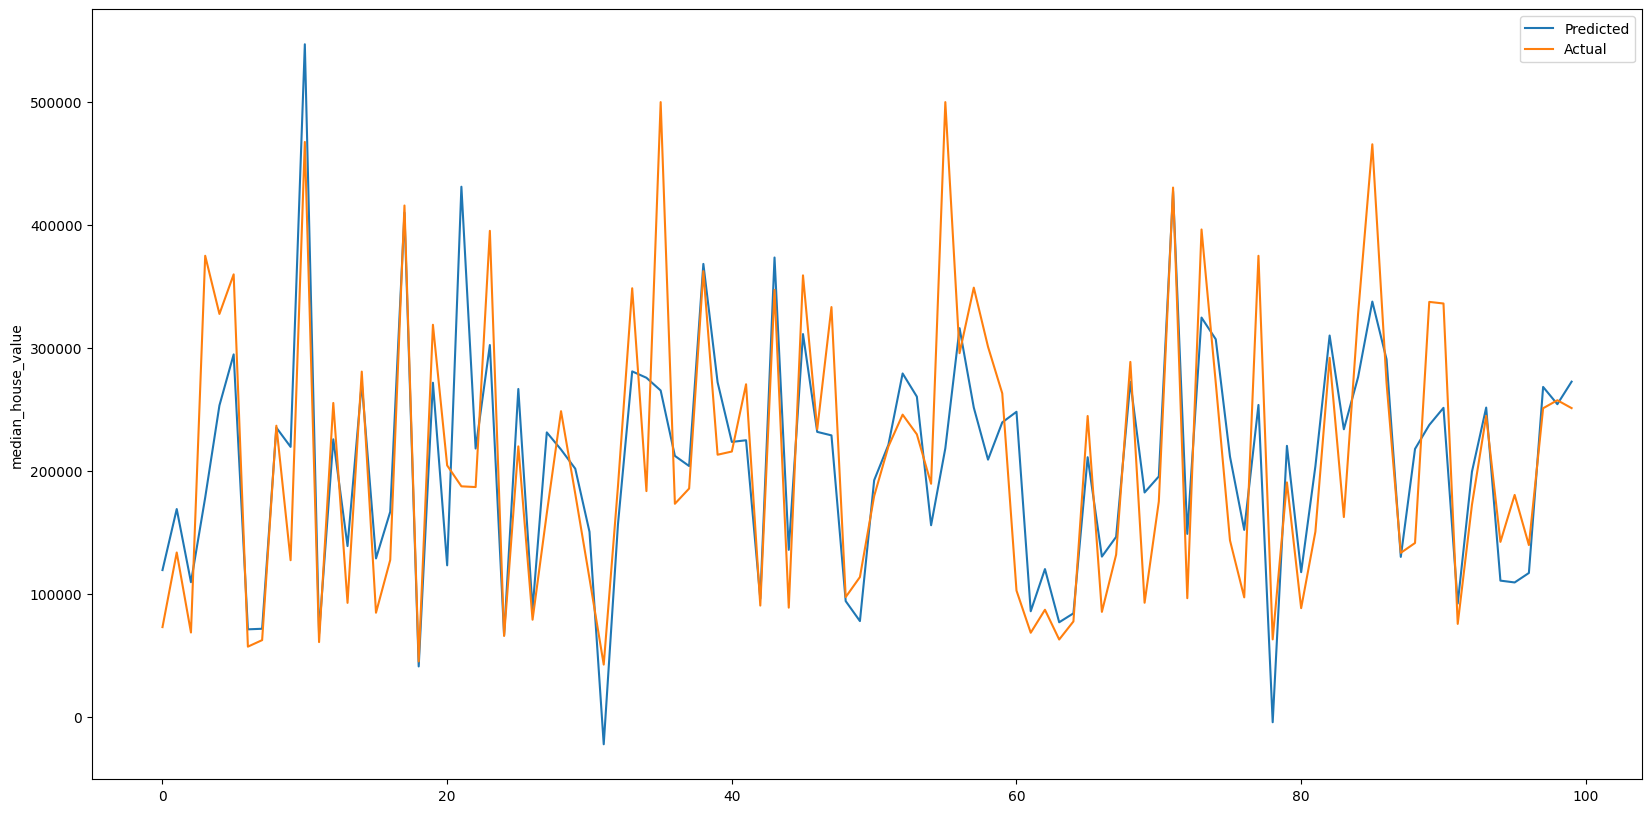

In [46]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()